<a href="https://colab.research.google.com/github/Fikazlf/DICODING-BIKE-SHARE/blob/main/Proyek_Analisis_Data_Syafika_Zalfanissa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing
- **Nama:** Syafika Zalfanissa Dila
- **Email:** syafikazalfanissa07@gmail.com
- **ID Dicoding:** Syafika Zalfanissa Dila

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di tahun 2012?
- Bagaimana tren penyewaan sepeda dalam setahun, apakah 2014 atau 2015 paling diminati?
- Bagaimana pola penyewaan sepeda berbeda antara pengguna terdaftar dan tidak terdaftar

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## Data Wrangling

In [4]:
# Membaca dataset hari
day_df = pd.read_csv('/content/day.csv')

# Jika Anda juga ingin membaca dataset jam
hour_df = pd.read_csv('/content/hour.csv')


### Gathering Data

In [5]:
#DAY DATA SET
day_df = pd.read_csv('/content/day.csv')
day_df.head ()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
#HOUR DATA SET
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head ()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

###Mengecek day__df

In [7]:
#Cek tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat 1 tipe data yang tidak sesuai yaitu pada dteday seharusnya menggunakan datetime bukan objek

In [8]:
#Mengecek duplicate data
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Semua data bersifat unik artinya tidak terdapat duplicate data

In [9]:
#Cek apakah terdapat keanehan dalam nilai statistiknya
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terdapat keanehan nilai statistiknya

###Menilai hour_df

In [10]:
#Cek info hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat ketidaksesuaian data yaitu pada dteday seharusnya menggunakan datetime

In [11]:
#Cek missing value dan jumlah duplikasi
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


### Cleaning Data

In [12]:
#Menghapus tabel yang tidak diperlukan
del hour_df

In [13]:
#Menghapus kolom yang tidak diperlukan

drop_col = ['instant', 'season', 'hr', 'holiday', 'weekday','workingday','temp','atemp','hum','windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()


,dteday,yr,mnth,weathersit,casual,registered,cnt
0,2011-01-01,0,1,2,331,654,985
1,2011-01-02,0,1,2,131,670,801
2,2011-01-03,0,1,1,120,1229,1349
3,2011-01-04,0,1,1,108,1454,1562
4,2011-01-05,0,1,1,82,1518,1600


Mengubah beberapa detail tentang kolom

In [14]:
# Mengubah angka menjadi keterangan
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

day_df.head()

,dteday,yr,mnth,weathersit,casual,registered,cnt
0,2011-01-01,0,Jan,Mist,331,654,985
1,2011-01-02,0,Jan,Mist,131,670,801
2,2011-01-03,0,Jan,Clear,120,1229,1349
3,2011-01-04,0,Jan,Clear,108,1454,1562
4,2011-01-05,0,Jan,Clear,82,1518,1600


In [15]:
#Mengubah tipe data
day_df['dteday'] = pd.to_datetime(day_df.dteday)
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   yr          731 non-null    category      
 2   mnth        731 non-null    category      
 3   weathersit  731 non-null    category      
 4   casual      731 non-null    int64         
 5   registered  731 non-null    int64         
 6   cnt         731 non-null    int64         
dtypes: category(3), datetime64[ns](1), int64(3)
memory usage: 25.7 KB


## Exploratory Data Analysis (EDA)

### Explore data day_df

In [16]:
day_df.describe(include="all")

,dteday,yr,mnth,weathersit,casual,registered,cnt
count,731,731.0,731,731,731.000000,731.000000,731.000000
unique,NaN,2.0,12,3,NaN,NaN,NaN
top,NaN,1.0,Aug,Clear,NaN,NaN,NaN
freq,NaN,366.0,62,463,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,3410.000000,6946.000000,8714.000000


In [17]:
#Kelompokkan penyewaan sepeda berdasarkan bulan
day_df.groupby(by='mnth').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-17-f0d60a5ed1b7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='mnth').agg({


cnt                           
       max   min         mean     sum
mnth                                 
Apr   7460   795  4484.900000  269094
Aug   7865  1115  5664.419355  351194
Dec   6606   441  3403.806452  211036
Feb   5062  1005  2655.298246  151352
Jan   4521   431  2176.338710  134933
Jul   8173  3285  5563.677419  344948
Jun   8120  3767  5772.366667  346342
Mar   8362   605  3692.258065  228920
May   8294  2633  5349.774194  331686
Nov   6852  1495  4247.183333  254831
Oct   8156    22  5199.225806  322352
Sep   8714  1842  5766.516667  345991

Berdasarkan hasil diatas, bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adlaah bulan Juni dan yang terkecil adalah bulan Januari

In [18]:
# Kelompokkan penyewaan sepeda berdasarkan kondisi cuaca
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

<ipython-input-18-c6c32e5cdc4b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weathersit').agg({


cnt                           
             max  min         mean      sum
weathersit                                 
Clear       8714  431  4876.786177  2257952
Light Snow  4639   22  1803.285714    37869
Mist        8362  605  4035.862348   996858

Terlihat bahwa penyewaan sepeda paling banyak saat cuaca sedang cerah

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di tahun 2012?

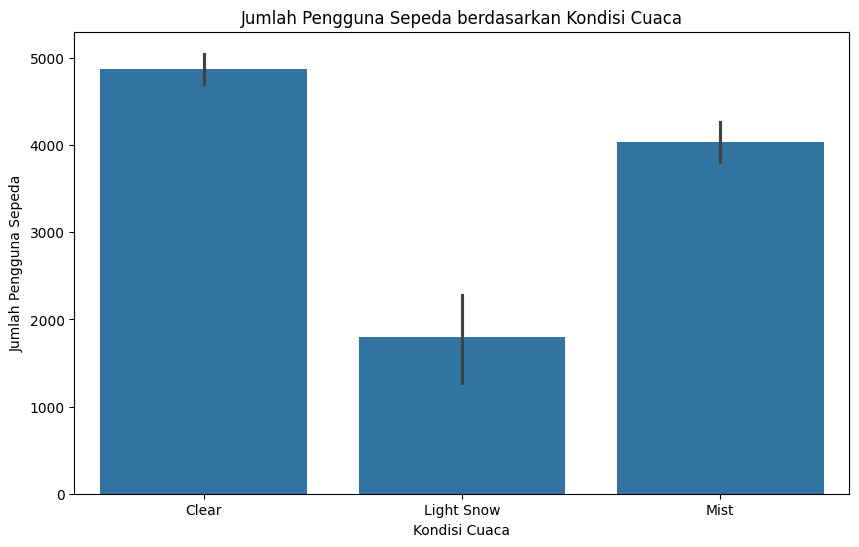

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data diatas, dapat disimpulkan bahwa terdapat hubungan antara kondisi cuaca dan penyewaan sepeda. Kondisi cuaca saat berkabut kurang diminati dibandingkan saat kondisi cerah, dan saat sedikit bersalju paling sedikit diminati

### Pertanyaan 2:  Bagaimana tren penyewaan sepeda dalam setahun, apakah 2014 atau 2015 paling diminati?

2. Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun


<ipython-input-20-8ad7d93530fb>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["mnth", "yr"]).agg({"cnt": "sum"}).reset_index()


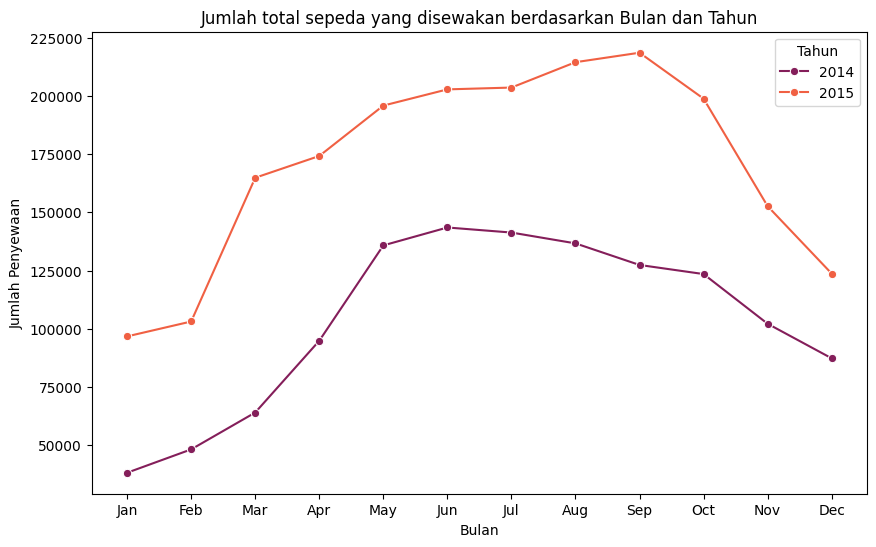

In [20]:
def plot_monthly_trends():
    # Mengelompokkan data berdasarkan bulan dan tahun, lalu menghitung jumlah sepeda yang disewakan
    monthly_counts = day_df.groupby(by=["mnth", "yr"]).agg({"cnt": "sum"}).reset_index()

    # Mengganti 0 dan 1 dengan tahun yang sesuai
    monthly_counts['yr'] = monthly_counts['yr'].map({0: 2014, 1: 2015})

    # Mengonversi 'mnth' menjadi kategori yang diurutkan
    monthly_counts['mnth'] = pd.Categorical(
        monthly_counts['mnth'],
        categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        ordered=True
    )

    # Membuat plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="rocket", marker="o")
    plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun")
    plt.xlabel("Bulan")
    plt.ylabel("Jumlah Penyewaan")
    plt.legend(title="Tahun", loc="upper right")
    plt.show()

print("2. Jumlah total sepeda yang disewakan berdasarkan Bulan dan Tahun")
plot_monthly_trends()

###Pertanyaan 3: Bagaimana pola penyewaan sepeda berbeda antara pengguna terdaftar dan tidak terdaftar

3. Perbandingan Penyewaan antara Pengguna Terdaftar dan Tidak Terdaftar


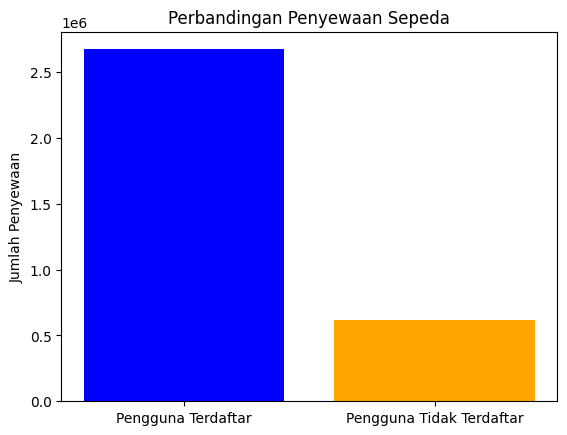

In [21]:
def plot_user_type_comparison():
    total_registered = day_df['registered'].sum()
    total_casual = day_df['casual'].sum()

    labels = ['Pengguna Terdaftar', 'Pengguna Tidak Terdaftar']
    values = [total_registered, total_casual]

    plt.bar(labels, values, color=['blue', 'orange'])
    plt.title('Perbandingan Penyewaan Sepeda')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()

print("3. Perbandingan Penyewaan antara Pengguna Terdaftar dan Tidak Terdaftar")
plot_user_type_comparison()

## Conclusion

- Conclution pertanyaan 1
Kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, dengan cuaca cerah menjadi faktor utama dalam meningkatkan minat penyewaan.

- Conclution pertanyaan 2
Berdasarkan grafik perbandingan penyewaan sepeda, jumlah total sepeda yang disewakan berdasarkan bulan meningkat dari bulan Januari hingga bulan September pada tahun kedua, namun setelah bulan September, terdapat penurunan signifikan. Tahun 2015 (dilambarkan dengan garis oranye) menunjukan tren yang lebih tinggi dalam jumlah penyewaan sepeda dibanding tahun 2014 (dilambangkan dengan garis ungu)

- Conclution pertanyaan 3
Berdasarkan grafik perbandingan penyewaan sepeda, terlihat bahwa jumlah penyewaan sepeda oleh pengguna terdaftar (dalam warna biru) jauh lebih tinggi dibandingkan dengan pengguna tidak terdaftar (dalam warna oranye). Ini menunjukkan bahwa pengguna yang terdaftar lebih sering menggunakan layanan penyewaan sepeda dibandingkan yang tidak terdaftar.